In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving antfile17.csv to antfile17.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['antfile17.csv']))

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
# data = pd.read_csv('ant1.7.csv')

# Display class distribution
print(df2['bug'].value_counts())

# If the dataset is imbalanced, apply SMOTE
X = df2.drop('bug', axis=1)
y = df2['bug']

# Check if data is imbalanced
bug_count = y.value_counts()
if bug_count[0] != bug_count[1]:
    smote = SMOTE(sampling_strategy='auto')
    X, y = smote.fit_resample(X, y)

print(y.value_counts())  # Verify that the dataset is balanced


bug
0    579
1    166
Name: count, dtype: int64
bug
1    579
0    579
Name: count, dtype: int64


In [ ]:
# Split the data into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Build the sequential model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(8, activation='relu'))

# Third hidden layer
model.add(Dense(4, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model on training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3665 - loss: 0.7543 - val_accuracy: 0.5862 - val_loss: 0.6917
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - loss: 0.6735 - val_accuracy: 0.6609 - val_loss: 0.6645
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.6167 - val_accuracy: 0.7241 - val_loss: 0.6212
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7602 - loss: 0.5490 - val_accuracy: 0.7644 - val_loss: 0.5678
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7476 - loss: 0.5196 - val_accuracy: 0.7586 - val_loss: 0.5483
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4634 - val_accuracy: 0.7644 - val_loss: 0.5352
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 0.4533 - val_accuracy: 0.7759 - val_loss: 0.5313
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8123 - loss: 0.4306 - val_accuracy: 0.7759 - val_loss: 0.5

In [ ]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
[[117  33]
 [ 23 117]]


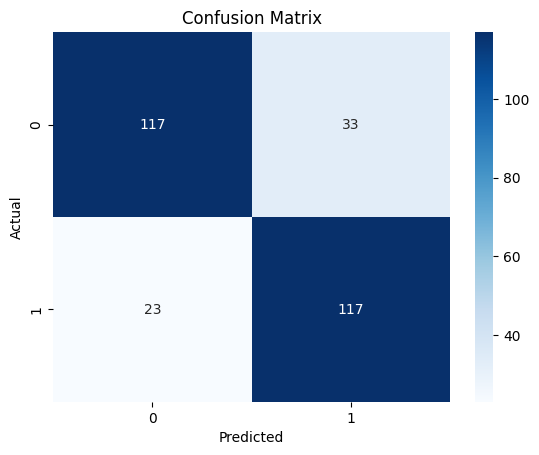

In [ ]:
# Plotting the confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       150
           1       0.78      0.84      0.81       140

    accuracy                           0.81       290
   macro avg       0.81      0.81      0.81       290
weighted avg       0.81      0.81      0.81       290



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


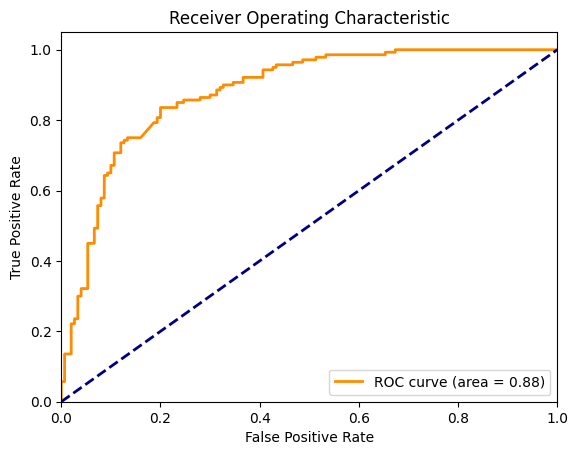

In [ ]:
# Generate ROC curve and AUC
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
